# Trabajo Práctico Final

# Grupo 10
### Integrantes:
- Facundo Peloso
- Eduardo Barbas
- Roberto Biancardi 
- Juan Pablo Anselmo
-Matias 

El objetivo de este trabajo práctico es implementar modelos de regresión categórica que nos permita resolver problemas de clasificación.

Para ello utilizaremos un dataset "propio", es decir, fue seleccionado por los integrantes de nuestro grupo.

El dataset seleccionado fue un registro de las partidas de ajedrez jugadas en el sitio Chess.com

Estos datos describen características de los juegos como: 

La variable target elegida es la de **Inserte Target**.



## 0. Importación de Módulos y Librerías

In [1]:
#Importacion de librerias/módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
pd.set_option("display.max_columns", None)



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm
from statsmodels.tools import eval_measures

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## 1. Lectura de Datos

In [3]:
#Establezco la dirección del archivo
file_location="twic_master.csv"

#Leo el data set usando la librería pandas
# y se almacena en el objeto Dataframe llamado datos_crudos  
datos_crudos=pd.read_csv(file_location, index_col=0)

c:\Users\fpeloso\Anaconda3\envs\dhdsblend2021\lib\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (10,13,14,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\Users\fpeloso\Anaconda3\envs\dhdsblend2021\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [25]:
datos_crudos.sample(30)

,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,EventType,Time_Control
twic_number,,,,,,,,,,,,,,,,,,,,,
1223,"bonnmann,r","van dael,siem",2018-02-04,2017.10.08,2nd bundesliga west 2017-18,1/2-1/2,1. d4 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. Nf3 ...,germany ger,False,6.7,E92,king's indian,4.62814e+06,1.04977e+06,2229.0,2286.0,andersson variation,NaN,fm,NaN,NaN
1386,"sumaneev,d","skalik,p",2021-05-25,2021.05.25,titled tuesday 25th may,1-0,1. e4 c6 2. Nc3 d5 3. d4 dxe4 4. Nxe4 Bf5 5. N...,chess.com int,True,3,B18,caro-kann,4.12531e+06,1.10073e+06,2450.0,2367.0,classical variation,im,im,NaN,NaN
1399,"bashirli,saadat","kholin,a",2021-08-24,2021.08.24,titled tuesday 24th aug,1-0,1. e4 c5 2. Nf3 d6 3. Bb5+ Nd7 4. O-O Nf6 5. R...,chess.com int,True,10,B51,sicilian,1.343e+07,1.42022e+07,1320.0,2052.0,"canal-sokolsky (nimzovich-rossolimo, moscow) a...",wcm,NaN,NaN,NaN
1190,"burdalev,k","zuttioni,f",2017-08-24,2017.08.20,7th split open 2017,1-0,1. d4 Nf6 2. c4 e6 3. g3 d5 4. Nf3 Be7 5. Bg2 ...,split cro,False,6.1,E09,catalan,1.41219e+07,849596,2368.0,2192.0,"closed, main line",fm,NaN,NaN,NaN
1366,"selvik,elma","sithumsa,h g sasmi",2021-01-07,2021.01.07,11th sharjah women prelim,1-0,1. d4 d5 2. c4 e6 3. Nf3 Nf6 4. g3 Be7 5. Bg2 ...,lichess.org int,True,11,E06,catalan,1.53224e+06,2.99539e+07,1374.0,NaN,"closed, 5.nf3",NaN,NaN,NaN,NaN
1291,"rakic,tijana","pajkovic,v",2019-07-21,2019.07.20,tch-mne premier 2019,0-1,1. e4 e5 2. d4 exd4 3. Nf3 d5 4. Qxd4 Nf6 5. e...,podgorica mne,False,2.5,C21,centre game,1.65042e+07,900699,1546.0,2426.0,NaN,NaN,fm,team,team
1101,"pijanovic,d","kvaternik,s",2015-12-07,2015.12.05,8th mediteran 2017 open,1/2-1/2,1. d4 d5 2. c4 Nf6 3. Nf3 e6 4. Nc3 b6 5. Bg5 ...,rijeka cro,False,4.12,D37,qgd,1.45141e+07,1.45085e+07,1662.0,1869.0,4.nf3,NaN,NaN,NaN,NaN
1234,"dominguez perez,l","meier,geo",2018-06-26,2018.06.26,chess.com speed inv qualifier,1-0,1. e4 e6 2. d4 d5 3. Nc3 Nf6 4. e5 Nfd7 5. Nce...,chess.com int,True,1.14,C11,french,3.50324e+06,4.67579e+06,2739.0,2628.0,steinitz variation,gm,gm,NaN,NaN
1440,"hoffmann,as","hartikainen,j",2022-06-07,2022.06.07,titled tue 7th jun late,1-0,1. d4 Nf6 2. Bg5 Ne4 3. Bf4 d5 4. f3 Nd6 5. Nc...,chess.com int,True,4,A45,"trompovsky attack (ruth, opovcensky opening)",2.00147e+06,503134,2185.0,2133.0,NaN,fm,cm,NaN,NaN


In [6]:
datos_crudos.columns

Index(['White', 'Black', 'Date', 'EventDate', 'Event', 'Result',
       'mainline_moves', 'Site', 'Online', 'Round', 'ECO', 'Opening',
       'WhiteFideId', 'BlackFideId', 'WhiteElo', 'BlackElo', 'Variation',
       'WhiteTitle', 'BlackTitle', 'WhiteTeam', 'BlackTeam', 'EventType',
       'FEN', 'SetUp', 'Variant', 'Board', 'PlyCount', 'EventCategory'],
      dtype='object')

In [5]:
datos_crudos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971319 entries, 1260 to 980
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   White           object 
 1   Black           object 
 2   Date            object 
 3   EventDate       object 
 4   Event           object 
 5   Result          object 
 6   mainline_moves  object 
 7   Site            object 
 8   Online          bool   
 9   Round           object 
 10  ECO             object 
 11  Opening         object 
 12  WhiteFideId     object 
 13  BlackFideId     object 
 14  WhiteElo        float64
 15  BlackElo        float64
 16  Variation       object 
 17  WhiteTitle      object 
 18  BlackTitle      object 
 19  WhiteTeam       object 
 20  BlackTeam       object 
 21  EventType       object 
 22  FEN             object 
 23  SetUp           float64
 24  Variant         object 
 25  Board           float64
 26  PlyCount        float64
 27  EventCategory   float64
dtypes: bool(1), f

In [7]:
datos_crudos.mainline_moves.value_counts()

1. e4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            2241
1. d4                                                                                                                                                                                                                                                                             

### Limpieza de Datos

Saco columnas innecesarias

In [4]:
# Tiro las columnas que no interesan
datos_crudos = datos_crudos.drop(["PlyCount", "Board", "EventCategory", "BlackTeam", "WhiteTeam"], axis=1)

Filtramos los juegos que son de chess 960 y luego borramos la columnas

In [6]:
# Primero me quedo solo con los registros nulos en las columnas relacionadas con la modalidad 960
# De este modo me voy a quedar con las partidas que NO son 960chess
datos_crudos = datos_crudos[ (datos_crudos.Variant.isna()) & (datos_crudos.FEN.isna()) & (datos_crudos.SetUp.isna()) ]

# Despues tiro estas columnas que ya no me dicen nada
datos_crudos = datos_crudos.drop(["Variant", "FEN", "SetUp"], axis=1)

AttributeError: 'DataFrame' object has no attribute 'Variant'

In [6]:
datos_crudos.EventType.value_counts()

team                  80476
swiss                 54121
blitz                 17099
team-tourn             9879
tourn                  9488
rapid                  7267
team-swiss             3788
k.o.                   2977
swiss (blitz)          2188
k.o. blitz              915
Team                    495
swiss (rapid)           485
team-match              400
team-tourn (rapid)      362
match                   334
schev                   320
match (blitz)           207
tourn (blitz)           197
tourn (rapid)           197
match (rapid)           158
k.o. (blitz)            150
team-swiss (rapid)      112
team (rapid)            109
team-match (blitz)       94
tourn (corr)             91
team-                    80
schev (rapid)            64
team-schev (blitz)       64
schev (blitz)            40
team-schev (rapid)       32
team-match (rapid)       22
k.o. rapid               17
team-k.o.                16
simul                    15
game                      1
game (blitz)        

In [31]:
datos_crudos.EventType.isna().sum()

1778508

In [33]:
datos_crudos.Event.isna().sum()

0

In [7]:
#datos_blitz = datos[(datos.Event.str.contains("blitz")) | (datos.EventType.str.contains("blitz"))]
def condition(x):
    if "blitz" in str(x):
        return "blitz"
    elif "rapid" in str(x):
        return "rapid"
    elif "team" in str(x):
        return "team"
    else: 
        return "classic"
 
# Applying the conditions
#datos_crudos['Time_Control'] = datos_crudos['EventType'].apply(condition)
 
datos_crudos['Time_Control'] = datos_crudos['EventType'].apply(condition)




In [8]:
datos_crudos.Time_Control.value_counts()

classic    1846350
team         94639
blitz        20955
rapid         8825
Name: Time_Control, dtype: int64

In [7]:
datos_crudos.Event.value_counts()

PRO League Group Stage                         7861
ch-FRA Blitz Online Qual                       4900
Djerba Women Online 2020                       4651
World Youth U16 Olympiad                       4275
44th Olympiad 2022                             4070
                                               ... 
ch-POL Playoff 2013                               1
122nd US Open Armageddon                          1
FIDE Steinitz Women TB                            1
43rd Annual World Open TB                         1
chess.com Blitz Final 3m+2spm Chess960 2016       1
Name: Event, Length: 11150, dtype: int64

In [22]:
display(datos_crudos.shape)
datos_crudos.columns

(1970769, 22)

Index(['White', 'Black', 'Date', 'EventDate', 'Event', 'Result',
       'mainline_moves', 'Site', 'Online', 'Round', 'ECO', 'Opening',
       'WhiteFideId', 'BlackFideId', 'WhiteElo', 'BlackElo', 'Variation',
       'WhiteTitle', 'BlackTitle', 'EventType', 'Time_Control', 'Fecha'],
      dtype='object')

In [23]:
# Vamos a poner todas las letras en minuscula y eliminar espacios en los extremos
# En "mainline_moves" y "ECO" NO toco las mayúsculas ya tienen relevancia en la notación.
cols = ["White", "Black", "Event", "Site", "Opening", "Variation", "WhiteTitle", "BlackTitle", "EventType","Time_Control"]
for feature in cols:
    
    datos_crudos[feature] = datos_crudos[feature].str.lower().str.strip()

In [13]:
datos_crudos.Date.iloc[0]

'2018-12-26'

In [24]:
datos_crudos["Fecha"] = pd.to_datetime(datos_crudos["Date"])

In [8]:
datos_crudos['Fecha'].iloc[0]

Timestamp('2018-12-26 00:00:00')

In [12]:
datos_crudos['Fecha'].value_counts()

2021-02-16    6185
2020-05-16    5749
2020-06-14    5079
2021-03-13    4826
2022-08-02    3780
              ... 
2012-06-04       1
2012-05-05       1
2012-05-03       1
2012-05-06       1
1988-11-18       1
Name: Fecha, Length: 3800, dtype: int64

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.66110e+05, 6.17038e+05, 9.00552e+05, 2.87616e+05, 1.00000e+00]),
 array([ 6896. ,  8397.8,  9899.6, 11401.4, 12903.2, 14405. , 15906.8,
        17408.6, 18910.4, 20412.2, 21914. ]),
 <BarContainer object of 10 artists>)

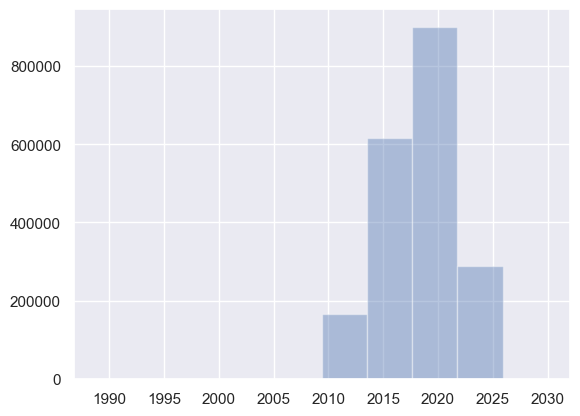

In [13]:
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.hist(datos_crudos['Fecha'], label='fechas', alpha = 0.4)

In [21]:
datos_crudos.shape

(1970769, 22)

## Aca empezamos a filtrar los datos

primero filtro temporalmente a partir de 2021

In [25]:
datos=datos_crudos.loc[datos_crudos['Fecha'].dt.year>2021]

In [26]:
datos.shape

(225984, 22)

In [27]:
datos.head()

,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,EventType,Time_Control,Fecha
twic_number,,,,,,,,,,,,,,,,,,,,,,
1424,"nakamura,hi","rapport,r",2022-02-12,2022.02.12,fide grand prix 1 playoff,1-0,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. cxd5 exd5 5. B...,berlin ger,False,1.1,D36,qgd,2.01619e+06,738590,2736.0,2763.0,"exchange, positional line, 6.qc2",gm,gm,NaN,classic,2022-02-12
1424,"aronian,l","dominguez perez,l",2022-02-12,2022.02.12,fide grand prix 1 playoff,1-0,1. d4 d5 2. c4 dxc4 3. e4 b5 4. a4 c6 5. axb5 ...,berlin ger,False,1.1,D20,qga,1.33005e+07,3.50324e+06,2772.0,2752.0,3.e4,gm,gm,NaN,classic,2022-02-12
1424,"rapport,r","nakamura,hi",2022-02-13,2022.02.12,fide grand prix 1 playoff,1/2-1/2,1. Nf3 d5 2. g3 Nf6 3. Bg2 e6 4. O-O Be7 5. d3...,berlin ger,False,1.2,A07,reti,738590,2.01619e+06,2763.0,2736.0,king's indian attack (barcza system),gm,gm,NaN,classic,2022-02-13
1424,"dominguez perez,l","aronian,l",2022-02-13,2022.02.12,fide grand prix 1 playoff,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. d3 Be7 5. O-...,berlin ger,False,1.2,C55,two knights defence (modern bishop's opening),3.50324e+06,1.33005e+07,2752.0,2772.0,NaN,gm,gm,NaN,classic,2022-02-13
1424,"nakamura,hi","aronian,l",2022-02-15,2022.02.12,fide grand prix 1 playoff,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-...,berlin ger,False,2.1,C88,ruy lopez,2.01619e+06,1.33005e+07,2736.0,2772.0,"closed, 7...o-o",gm,gm,NaN,classic,2022-02-15


### Limpio la columna resultados. Dejo en Nan los que no coinciden y luego los borramos

In [13]:
def condition(x):
    if x=='1-0':
        return 0
    elif x=='0-1':
        return 1
    elif x=='1/2-1/2':
        return 2
    else: 
        return np.NaN
 
# Applying the conditions
datos['Resultado'] = datos['Result'].apply(condition)
 
#print(df)

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_13832\3252946653.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Resultado'] = datos['Result'].apply(condition)


In [19]:
#Creo columna resultado 
#datos['Resultado'] = datos['Result'].apply(lambda x: 0 if x=='1-0' else if x=='0-1' )

In [11]:
datos['Resultado'].isna().sum()

52

In [33]:
datos['mainline_moves'].iloc[0]

'1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. cxd5 exd5 5. Bg5 c6 6. Qc2 Be7 7. e3 Nbd7 8. Bd3 Nh5 9. Bxe7 Qxe7 10. O-O-O Nb6 11. h3 g6 12. Nf3 Ng7 13. g4 Be6 14. Ne2 O-O-O 15. Kb1 Kb8 16. Rc1 Ne8 17. Nf4 Nd6 18. a4 Ndc4 19. a5 Qb4 20. Qc3 Qxa5 21. Qxa5 Nxa5 22. Ng5 Rdf8 23. Bxg6 Nb3 24. Nfxe6 fxe6 25. Nxh7 Rfg8 26. Bd3 Nxc1 27. Kxc1 Rg7 28. Nf6 Rf7 29. g5 Rxf6 30. gxf6 Rf8 31. h4 Rxf6 32. h5 Rh6 33. Kd2 Kc7 34. Ke2 Kd6 35. Kf3 Ke7 36. Kg4 Kf6 37. Rh3 Nc8 38. Rf3+ Kg7 39. Bg6 Nd6 40. Kg5 a5 41. Rf4 Ne4+ 42. Bxe4 dxe4 43. Rxe4 Rf6 44. f4 Rf5+ 45. Kg4 Rb5 46. Rxe6 a4 47. Re7+ Kh6 48. Re8 Rxb2 49. Rh8+ Kg7 50. Ra8 b5 51. e4 Ra2 52. Ra7+ Kh6 53. Ra6 Kh7 54. Ra7+ Kh6 55. Ra6 Kh7 56. e5 b4 57. e6 b3 58. Kf5 Ra1 59. Rb6 Re1 60. Kf6 Re4 61. e7 Rxf4+ 62. Ke5 Rf1 63. Kd6 Re1 64. Kd7 c5 65. dxc5 Rd1+ 66. Kc7 Re1 67. Kd6 Rd1+ 68. Kc6 Re1 69. Rb4 b2 70. Rxb2 Rxe7 71. Ra2'

In [22]:
type(datos['mainline_moves'].iloc[0])

str

In [23]:
#aux=datos['mainline_moves'].iloc[0].replace(" ", "")
moves_serie=datos['mainline_moves'].iloc[0].replace(" ", "").split('.')


In [24]:
#deberia remover los espacioes en blanco del string. luego separar por puntos

In [25]:
len(moves_serie)

72

### Creo la columna cantidad de Movimientos

In [14]:
def cant_move(x):
    if type(x) is str:
        return len(x.replace(" ", "").split('.'))
    else:
        return np.NaN
# Applying the conditions
datos['cant_mov'] = datos['mainline_moves'].apply(cant_move)

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_13832\3200335042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['cant_mov'] = datos['mainline_moves'].apply(cant_move)


In [35]:
datos.head()

,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,EventType,Fecha,Resultado,cant_mov
twic_number,,,,,,,,,,,,,,,,,,,,,,,
1424,"nakamura,hi","rapport,r",2022-02-12,2022.02.12,fide grand prix 1 playoff,1-0,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. cxd5 exd5 5. B...,berlin ger,False,1.1,D36,qgd,2.01619e+06,738590,2736.0,2763.0,"exchange, positional line, 6.qc2",gm,gm,NaN,2022-02-12,0.0,72.0
1424,"aronian,l","dominguez perez,l",2022-02-12,2022.02.12,fide grand prix 1 playoff,1-0,1. d4 d5 2. c4 dxc4 3. e4 b5 4. a4 c6 5. axb5 ...,berlin ger,False,1.1,D20,qga,1.33005e+07,3.50324e+06,2772.0,2752.0,3.e4,gm,gm,NaN,2022-02-12,0.0,42.0
1424,"rapport,r","nakamura,hi",2022-02-13,2022.02.12,fide grand prix 1 playoff,1/2-1/2,1. Nf3 d5 2. g3 Nf6 3. Bg2 e6 4. O-O Be7 5. d3...,berlin ger,False,1.2,A07,reti,738590,2.01619e+06,2763.0,2736.0,king's indian attack (barcza system),gm,gm,NaN,2022-02-13,2.0,31.0
1424,"dominguez perez,l","aronian,l",2022-02-13,2022.02.12,fide grand prix 1 playoff,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. d3 Be7 5. O-...,berlin ger,False,1.2,C55,two knights defence (modern bishop's opening),3.50324e+06,1.33005e+07,2752.0,2772.0,NaN,gm,gm,NaN,2022-02-13,2.0,32.0
1424,"nakamura,hi","aronian,l",2022-02-15,2022.02.12,fide grand prix 1 playoff,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-...,berlin ger,False,2.1,C88,ruy lopez,2.01619e+06,1.33005e+07,2736.0,2772.0,"closed, 7...o-o",gm,gm,NaN,2022-02-15,2.0,55.0


Seguimos filtrando

In [89]:
#datos=datos.drop(1537798)
datos.iloc[1537798]

White                                                   biswas,karl
Black                                                   maloberti,d
Date                                                     2012-10-21
EventDate                                                2012.10.21
Event                                            38th guernsey open
Result                                                      1/2-1/2
mainline_moves    1. d4 Nf6 2. Nf3 g6 3. c4 Bg7 4. Nc3 d6 5. e4 ...
Site                                                   guernsey gci
Online                                                        False
Round                                                             1
ECO                                                             E90
Opening                                               king's indian
WhiteFideId                                                        
BlackFideId                                                  620149
WhiteElo                                        

In [34]:
#datos.drop(labels=1537798, inplace=True)
datos = datos.drop(index=datos.iloc[1537798].name)

IndexError: single positional indexer is out-of-bounds

In [15]:
# Pasemos los números de identificación fide que son tipo object a enteros:

datos['WhiteFideId'] = pd.to_numeric(datos['WhiteFideId']).convert_dtypes() 

datos['BlackFideId'] = pd.to_numeric(datos['BlackFideId']).convert_dtypes() 

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_13832\3503574612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['WhiteFideId'] = pd.to_numeric(datos['WhiteFideId']).convert_dtypes()
C:\Users\fpeloso\AppData\Local\Temp\ipykernel_13832\3503574612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['BlackFideId'] = pd.to_numeric(datos['BlackFideId']).convert_dtypes()


In [23]:
datos.shape

(528729, 23)

## filtramos blitz y 2010 en adelante y quedan 37k registros

In [46]:
# Hagamos un df con partidas blitz
datos_blitz = datos[(datos.Event.str.contains("blitz")) | (datos.EventType.str.contains("blitz"))]
datos_blitz.shape

(4457, 24)

In [17]:
datos_blitz=datos

In [18]:
datos_blitz.shape

(225984, 24)

In [74]:
datos_blitz['WhiteFideId'] = pd.to_numeric(datos_blitz['WhiteFideId']).convert_dtypes() 

datos_blitz['BlackFideId'] = pd.to_numeric(datos_blitz['BlackFideId']).convert_dtypes() 

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_10024\2232308441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_blitz['WhiteFideId'] = pd.to_numeric(datos_blitz['WhiteFideId']).convert_dtypes()
C:\Users\fpeloso\AppData\Local\Temp\ipykernel_10024\2232308441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_blitz['BlackFideId'] = pd.to_numeric(datos_blitz['BlackFideId']).convert_dtypes()


In [49]:
#13300474
#738590
#4126025
#3503240
#13401319

#623539
#14204118
#46616543
#5029465
#4158814

 
masktop_10= (datos_blitz['WhiteFideId']==1503014) | (datos_blitz['WhiteFideId']==4168119) | (datos_blitz['WhiteFideId']==13400924)|(datos_blitz['WhiteFideId']==5000017)|(datos_blitz['WhiteFideId']==5202213)|\
    (datos_blitz['WhiteFideId']==2020009)|(datos_blitz['WhiteFideId']==2016192)|(datos_blitz['WhiteFideId']==24116068)|(datos_blitz['WhiteFideId']==12573981)|(datos_blitz['WhiteFideId']==8603677)\
    |(datos_blitz['WhiteFideId']==13300474)|(datos_blitz['WhiteFideId']==738590)|(datos_blitz['WhiteFideId']==4126025)|(datos_blitz['WhiteFideId']==3503240)|(datos_blitz['WhiteFideId']==13401319)\
    |(datos_blitz['WhiteFideId']==623539)|(datos_blitz['WhiteFideId']==14204118)|(datos_blitz['WhiteFideId']==46616543)|(datos_blitz['WhiteFideId']==5029465)|(datos_blitz['WhiteFideId']==4158814)


masktop_10_black= (datos_blitz['BlackFideId']==1503014) | (datos_blitz['BlackFideId']==4168119) | (datos_blitz['BlackFideId']==13400924)|(datos_blitz['BlackFideId']==5000017)|(datos_blitz['BlackFideId']==5202213)|\
    (datos_blitz['BlackFideId']==2020009)|(datos_blitz['BlackFideId']==2016192)|(datos_blitz['BlackFideId']==24116068)|(datos_blitz['BlackFideId']==12573981)|(datos_blitz['BlackFideId']==8603677)\
    |(datos_blitz['BlackFideId']==13300474)|(datos_blitz['BlackFideId']==738590)|(datos_blitz['BlackFideId']==4126025)|(datos_blitz['BlackFideId']==3503240)|(datos_blitz['BlackFideId']==13401319)\
    |(datos_blitz['BlackFideId']==623539)|(datos_blitz['BlackFideId']==14204118)|(datos_blitz['BlackFideId']==46616543)|(datos_blitz['BlackFideId']==5029465)|(datos_blitz['BlackFideId']==4158814)

In [50]:
datos_top10=datos_blitz.loc[(masktop_10) & (masktop_10_black) ]

In [51]:
datos_top10.shape

(814, 24)

In [40]:
datos_top10['Opening'][datos_top10['Opening'].str.len()>24].count()


1655

In [110]:
datos_top10['apertura']=datos_top10['Opening'].str.split().str[0]

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_2484\1185953698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_top10['apertura']=datos_top10['Opening'].str.split().str[0]


In [19]:
datos_blitz['apertura']=datos_blitz['Opening'].str.split().str[0]

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_13832\1797105559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_blitz['apertura']=datos_blitz['Opening'].str.split().str[0]


In [19]:
#data=datos_top10[['WhiteElo','BlackElo','Opening','Variation','Resultado','cant_mov','WhiteFideId','BlackFideId']] 

In [114]:
data=datos_top10[['WhiteElo','BlackElo','apertura','Resultado','cant_mov','WhiteFideId','BlackFideId']]

In [28]:
data=datos_blitz[['WhiteElo','BlackElo','apertura','Resultado','cant_mov','Time_Control']]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225984 entries, 1424 to 1450
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   WhiteElo      219534 non-null  float64
 1   BlackElo      219523 non-null  float64
 2   apertura      224279 non-null  object 
 3   Resultado     225975 non-null  float64
 4   cant_mov      224623 non-null  float64
 5   Time_Control  225984 non-null  object 
dtypes: float64(4), object(2)
memory usage: 12.1+ MB


In [113]:
data.WhiteFideId.value_counts().head(30)

2016192     753
1503014     671
5202213     651
13300474    604
623539      585
2020009     508
4168119     436
24116068    435
13401319    402
4126025     362
8603677     341
5000017     265
12573981    251
3503240     186
13400924    162
5029465     138
4158814     122
738590      113
14204118     91
46616543     18
Name: WhiteFideId, dtype: Int64

In [30]:
data=data.dropna(axis=0)

In [30]:
#data['cant_mov']=data['mainline_moves']

# Pruebo modelos para predecir Resultado

In [31]:
#X = data[['WhiteElo','BlackElo','Opening','Variation','cant_mov','WhiteFideId','BlackFideId']]
#X = data[['WhiteElo','BlackElo','apertura','cant_mov','WhiteFideId','BlackFideId']]

X = data[['WhiteElo','BlackElo','apertura','cant_mov','Time_Control']]
#Vector Target
y = data.Resultado


In [32]:
#Hago dummies
## hago dummies de barrios y tipo de propiedad
#from sklearn.preprocessing import OneHotEncoder
#categoricals = ['Opening', 'Variation']
#enc = OneHotEncoder(drop='first')
#X = listings_modelo[categoricals]
#enc.fit(X)
#enc.categories_

In [33]:
#enc=OneHotEncoder(drop='first')

In [34]:
#X_d=data[categoricals]

In [35]:
#X_d.head(2)

In [36]:
#enc.fit(X_d)
#enc.categories_

In [37]:
'''dummies = enc.transform(X_d).toarray()
dummies_df = pd.DataFrame(dummies)
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals))]
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i !=0]
dummies_df.columns = col_names_drop_first
#dummies_df'''

"dummies = enc.transform(X_d).toarray()\ndummies_df = pd.DataFrame(dummies)\ncol_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals))]\ncol_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i !=0]\ndummies_df.columns = col_names_drop_first\n#dummies_df"

In [38]:
#dummies_df.head()

In [39]:
#X_dum = X.drop(categoricals, axis=1)
#X = pd.concat([X_dum, dummies_df], axis=1)

In [40]:
#X = pd.concat([X_dum, dummies_df], axis=1)

In [22]:
#MaskDummies3 = datos['barrio'].isin(ListDummies)
#datosDummies = pd.get_dummies(datos[MaskDummies3]['barrio'])
#datos = pd.merge(datos, datosDummies, how='left', left_index=True, right_index=True)
#datos

#pd.get_dummies(data=df, columns=['A', 'B'])

#X_dum=pd.get_dummies(data=X,columns=['Opening','Variation','WhiteFideId','BlackFideId'])

In [32]:
X_dum=pd.get_dummies(data=X,columns=['apertura','Time_Control'])

In [33]:
X_dum.shape

(213789, 131)

In [59]:
y.value_counts()

0.0    92608
1.0    77919
2.0    43262
Name: Resultado, dtype: int64

Separo en Train y Test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state=1, stratify=y)

In [45]:
#X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state=1)#, stratify=y)

In [61]:
y_test.value_counts()

0.0    18522
1.0    15584
2.0     8652
Name: Resultado, dtype: int64

In [62]:
y_test.value_counts()/y_test.size

0.0    0.433182
1.0    0.364470
2.0    0.202348
Name: Resultado, dtype: float64

Funcion para evaluar

In [48]:
# Funcion para Scores

resultados_fin = pd.DataFrame()

def evaluacion(y_test, y_pred, model=""):
    # Crear diccionario para almacenar los resultados
    resultados = {}

    # Calcular sensibilidad
    sensibilidad = metrics.recall_score(y_test, y_pred, average='macro')
    resultados['Sensibilidad'] = round(sensibilidad,2)

    # Calcular accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    resultados['Accuracy'] = round(accuracy,2)

    # Calcular precision
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    resultados['Precision'] = round(precision,2)

    # Calcular F1 score
    f1_score = metrics.f1_score(y_test, y_pred, average='macro')
    resultados['F1 Score'] = round(f1_score,2)

    # Graficar matrix de confusion con heatmap
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=np.unique(y_test).tolist(), yticklabels=np.unique(y_pred).tolist())
    plt.title(f'Matrix de Confusion {model}')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.show()

    resultado_df = pd.DataFrame.from_dict(resultados, orient='index', columns=[model])
    resultados_fin[model]= resultado_df 
    return resultados_fin.transpose().reset_index().rename(columns={"index": "Modelos"})

Regresion Logistica

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000, random_state=1)

lr.fit(X_train, y_train) 

ypred_lr_train = lr.predict(X_train)
ypred_lr_test = lr.predict(X_test)


In [36]:
metrics.confusion_matrix(y_train, ypred_lr_train)

array([[56458, 17626,     2],
       [21741, 40593,     1],
       [19619, 14991,     0]], dtype=int64)

In [37]:
metrics.accuracy_score(y_train,ypred_lr_train)

0.5674468371230946

In [38]:
metrics.accuracy_score(y_test,ypred_lr_test)

0.5641049628139764

In [39]:
metrics.recall_score(y_test, ypred_lr_test, average='macro')

0.4683969965494536

In [40]:
metrics.precision_score(y_test, ypred_lr_test, average='macro')

c:\Users\fpeloso\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3748155465628744

In [41]:
metrics.f1_score(y_test, ypred_lr_test, average='macro')

0.41613616473576914

In [42]:
metrics.confusion_matrix(y_test, ypred_lr_test)

array([[14005,  4517,     0],
       [ 5469, 10115,     0],
       [ 4844,  3808,     0]], dtype=int64)

Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)


ypred_gnb_train = gnb.predict(X_train)


ypred_gnb_test = gnb.predict(X_test)

In [120]:
metrics.confusion_matrix(y_train, ypred_gnb_train)

array([[1644,  325, 3457],
       [ 104, 1442, 2399],
       [ 201,  293, 6279]], dtype=int64)

In [121]:
metrics.confusion_matrix(y_test, ypred_gnb_test)

array([[ 227,  114, 1015],
       [  69,  180,  737],
       [  88,  135, 1471]], dtype=int64)

In [122]:
print('acuracy', metrics.accuracy_score(y_test,ypred_gnb_test))
print('recall',metrics.recall_score(y_test, ypred_gnb_test, average='macro'))
print('precision',metrics.precision_score(y_test, ypred_gnb_test, average='macro'))
print('f1',metrics.f1_score(y_test, ypred_gnb_test, average='macro'))

acuracy 0.4653121902874133
recall 0.4061062748466775
precision 0.4890444423560892
f1 0.3712229392712496


### Knn

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Hyperparametros
parameters_knn = {"n_neighbors" : list(range(1, 15))}

clf_knn = GridSearchCV(knn, 
                   param_grid = parameters_knn, 
                   refit = True, 
                   cv = 3,
                   verbose=1,
                   n_jobs = -1)
                   

# Fit el modelo ya seleccionado
clf_knn.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  6.9min finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             verbose=1)

In [44]:
print("Los mejores parametros fueron %s con un score de %0.2f" % (clf_knn.best_params_, clf_knn.best_score_))

Los mejores parametros fueron {'n_neighbors': 14} con un score de 0.56


In [45]:
ypred_knn_train = clf_knn.predict(X_train)
ypred_knn_test = clf_knn.predict(X_test)

In [74]:
print('acuracy', metrics.accuracy_score(y_test,ypred_knn_test))
print('recall',metrics.recall_score(y_test, ypred_knn_test, average='macro'))
print('precision',metrics.precision_score(y_test, ypred_knn_test, average='macro'))
print('f1',metrics.f1_score(y_test, ypred_knn_test, average='macro'))

acuracy 0.5624210674025913
recall 0.4943873930645836
precision 0.5366990743732867
f1 0.4884045794775156


In [76]:
print(confusion_matrix(y_test,ypred_knn_test))

[[13245  4400   877]
 [ 5512  9347   725]
 [ 4039  3157  1456]]


In [46]:
tree_model = tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=6, random_state=50)
tree_model.fit(X_train, y_train)

y_train_tree_predict = tree_model.predict(X_train)
y_test_tree_predict = tree_model.predict(X_test)

print('resultados de train')
print(accuracy_score(y_train, y_train_tree_predict))
print(confusion_matrix(y_train, y_train_tree_predict))

print('resultados de test')
print(accuracy_score(y_test, y_test_tree_predict))
print(confusion_matrix(y_test, y_test_tree_predict))

resultados de train
0.5770766703112301
[[52064 21112   910]
 [18347 43267   721]
 [15852 15391  3367]]
resultados de test
0.5726179896159783
[[12893  5402   227]
 [ 4635 10755   194]
 [ 3936  3880   836]]


In [47]:
from sklearn.ensemble import BaggingClassifier

bagging_tree = tree.DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=bagging_tree, n_estimators=100,
                                bootstrap=True, n_jobs=1, random_state=50)
bagging_clf.fit(X_train, y_train)

print(accuracy_score(y_train, bagging_clf.predict(X_train)))
print(confusion_matrix(y_train, bagging_clf.predict(X_train)))

print(accuracy_score(y_test, bagging_clf.predict(X_test)))
print(confusion_matrix(y_test, bagging_clf.predict(X_test)))

0.9996842677643234
[[74064    14     8]
 [   16 62318     1]
 [    9     6 34595]]
0.5588895645259366
[[12513  4595  1414]
 [ 5066  9243  1275]
 [ 3550  2961  2141]]


In [77]:
from xgboost.sklearn import XGBClassifier
model_xg = XGBClassifier(n_jobs=-1, use_label_encoder=False)

In [78]:
from sklearn.model_selection import GridSearchCV
params = {  
    "n_estimators": [20,50,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}

In [79]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [80]:
xgb = GridSearchCV(model_xg, param_grid=params, cv=cv, verbose=1, n_jobs=-1)

In [81]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [46]:
xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [47]:
def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [48]:
evaluar_rendimiento(xgb.best_estimator_,"XG Boost", X_train, y_train, cv)

Rendimiento de XG Boost:	0.557 ± 0.009


In [39]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [41]:
print(accuracy_score(y_test, xgb.best_estimator_.predict(X_test)))
print(confusion_matrix(y_test, xgb.best_estimator_.predict(X_test)))

0.5547571853320119
[[ 657   62  637]
 [ 135  264  587]
 [ 271  105 1318]]
